# Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
df1=pd.read_csv('Salary Dataset og.csv')
#reading the data

# Exploratory data analysis

In [3]:
df1.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [5]:
df1.isnull().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

In [6]:
#handling the missing values

In [7]:
df1['Company Name'].fillna(value='Not available', method=None, axis=None, inplace=True)

In [8]:
df1['Salaries Reported'].fillna(value=0, method=None, axis=None, inplace=True)

In [9]:
df1.describe()

,Salaries Reported
count,4344.000000
mean,2.774632
std,5.145687
min,0.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,105.000000


# Data Cleaning

In [10]:
# The salary is non generalized and it is in different currency units and also in different time format so lets fix that!

In [11]:
df1['Salary/what?'] = df1['Salary'].map(lambda x: str(x)[-3:]) #stripping out last three characters to see types of time formats available

In [12]:
df1.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Salary/what?
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",/yr
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",/yr
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",/yr
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",/yr
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",/yr


In [13]:
df1['Salary/what?'].unique()

array(['/yr', '/mo', '/hr'], dtype=object)

In [14]:
# so we have salary stored in per month, per year and per hours so we have to convert them in per year

In [15]:
df1['Currency'] = df1['Salary'].map(lambda x: re.sub("[0-9]", "", x[:-3])) 
#removing all numeric digits from the salary string to see types of currency available

In [16]:
df1.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Salary/what?,Currency
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",/yr,"₹,,"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",/yr,"₹,,"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",/yr,"₹,,"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",/yr,"₹,,"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",/yr,"₹,,"


In [17]:
df1['Currency'] = df1['Currency'].map(lambda x: re.sub(",", "", x))
df1.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Salary/what?,Currency
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",/yr,₹
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",/yr,₹
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",/yr,₹
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",/yr,₹
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",/yr,₹


In [18]:
df1['Currency'].unique()

array(['₹', '$', '£', 'AFN '], dtype=object)

In [19]:
# so we have 4 types of currency available which we have to convert in rupees to generalise the data.

In [20]:
#forming a column which stores salary as a number and not string.
df1['num_Salary']=df1['Salary'].map(lambda x: x.replace('/yr',''))
df1['num_Salary']=df1['num_Salary'].map(lambda x: x.replace('/mo',''))
df1['num_Salary']=df1['num_Salary'].map(lambda x: x.replace('/hr',''))
df1['num_Salary']=df1['num_Salary'].map(lambda x: x.replace('₹',''))
df1['num_Salary']=df1['num_Salary'].map(lambda x: x.replace('$',''))
df1['num_Salary']=df1['num_Salary'].map(lambda x: x.replace('£',''))
df1['num_Salary']=df1['num_Salary'].map(lambda x: x.replace('AFN ',''))
df1['num_Salary']=df1['num_Salary'].map(lambda x: x.replace(',',''))

In [21]:
df1.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Salary/what?,Currency,num_Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",/yr,₹,648573
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",/yr,₹,1191950
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",/yr,₹,836874
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",/yr,₹,669578
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",/yr,₹,944110


In [22]:
# Converting num_salary to float object
df1['num_Salary'] = df1['num_Salary'].astype(float)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4344 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4344 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
 5   Salary/what?       4344 non-null   object 
 6   Currency           4344 non-null   object 
 7   num_Salary         4344 non-null   float64
dtypes: float64(2), object(6)
memory usage: 271.6+ KB


In [24]:
df1.describe()

,Salaries Reported,num_Salary
count,4344.000000,4.344000e+03
mean,2.774632,7.679888e+05
std,5.145687,7.692760e+05
min,0.000000,2.600000e+01
25%,1.000000,1.080980e+05
50%,1.000000,6.192115e+05
75%,3.000000,1.098333e+06
max,105.000000,9.568943e+06


In [25]:
#generalising the data to store salary in rs/year

In [26]:
def normal(sal,sym):
    if(sym=='/mo'):
        sal=sal*12
    elif(sym=='/hr'):
        sal=sal*8760
    else:
        sal=sal
    return sal

In [27]:
df1['salary/year'] = df1.apply(lambda x: normal(x['num_Salary'], x['Salary/what?']), axis=1)

In [28]:
df1.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Salary/what?,Currency,num_Salary,salary/year
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",/yr,₹,648573.0,648573.0
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",/yr,₹,1191950.0,1191950.0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",/yr,₹,836874.0,836874.0
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",/yr,₹,669578.0,669578.0
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",/yr,₹,944110.0,944110.0


In [29]:
df1['num_Salary'].sum()

3336143220.0

In [30]:
df1['salary/year'].sum()

4089262393.0

In [31]:
def normal1(sal,sym):
    if(sym=='AFN '):
        sal=sal*0.71
    elif(sym=='$'):
        sal=sal*74.39
    elif(sym=='£'):
        sal=sal*101.73
    else:
        sal=sal
    return sal

In [32]:
df1['salary in rs/year'] = df1.apply(lambda x: normal1(x['salary/year'], x['Currency']), axis=1)

In [33]:
df1.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Salary/what?,Currency,num_Salary,salary/year,salary in rs/year
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",/yr,₹,648573.0,648573.0,648573.0
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",/yr,₹,1191950.0,1191950.0,1191950.0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",/yr,₹,836874.0,836874.0,836874.0
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",/yr,₹,669578.0,669578.0,669578.0
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",/yr,₹,944110.0,944110.0,944110.0


In [34]:
df1['salary in rs/year'].sum()

5063196283.09

In [35]:
df1.drop(['Salary', 'Salary/what?', 'num_Salary', 'salary/year'], axis = 1, inplace=True)
#dropping all other unwanted column we created before

In [36]:
df1.head()

,Company Name,Job Title,Salaries Reported,Location,Currency,salary in rs/year
0,Mu Sigma,Data Scientist,105.0,Bangalore,₹,648573.0
1,IBM,Data Scientist,95.0,Bangalore,₹,1191950.0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,₹,836874.0
3,Impact Analytics,Data Scientist,40.0,Bangalore,₹,669578.0
4,Accenture,Data Scientist,32.0,Bangalore,₹,944110.0


In [37]:
df1.rename(columns = {'Currency':'Paid_in'}, inplace = True)
#storing the currency in which the employee receive his salary

In [38]:
df1.head()

,Company Name,Job Title,Salaries Reported,Location,Paid_in,salary in rs/year
0,Mu Sigma,Data Scientist,105.0,Bangalore,₹,648573.0
1,IBM,Data Scientist,95.0,Bangalore,₹,1191950.0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,₹,836874.0
3,Impact Analytics,Data Scientist,40.0,Bangalore,₹,669578.0
4,Accenture,Data Scientist,32.0,Bangalore,₹,944110.0


In [39]:
df1['Paid_in']=df1['Paid_in'].map(lambda x: x.replace('₹','Rupees'))
df1['Paid_in']=df1['Paid_in'].map(lambda x: x.replace('$','Dollars'))
df1['Paid_in']=df1['Paid_in'].map(lambda x: x.replace('£','Pound'))
df1['Paid_in']=df1['Paid_in'].map(lambda x: x.replace('AFN ','Afghani afghani'))

In [40]:
df1.head()

,Company Name,Job Title,Salaries Reported,Location,Paid_in,salary in rs/year
0,Mu Sigma,Data Scientist,105.0,Bangalore,Rupees,648573.0
1,IBM,Data Scientist,95.0,Bangalore,Rupees,1191950.0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,Rupees,836874.0
3,Impact Analytics,Data Scientist,40.0,Bangalore,Rupees,669578.0
4,Accenture,Data Scientist,32.0,Bangalore,Rupees,944110.0


In [41]:
df1['Paid_in'].unique()

array(['Rupees', 'Dollars', 'Pound', 'Afghani afghani'], dtype=object)

In [42]:
df1['Job Title'].unique()
# job profiles available

array(['Data Scientist', 'Data Science Associate',
       'Data Science Consultant', 'Data Science', 'Senior Data Scientist',
       'Junior Data Scientist', 'Lead Data Scientist',
       'Data Science Manager', 'Data Scientist - Trainee',
       'Data Science Lead', 'Data Analyst', 'Data Engineer',
       'Machine Learning Engineer', 'Machine Learning Software Engineer',
       'Software Engineer - Machine Learning',
       'Machine Learning Engineer/Data Scientist',
       'Machine Learning Consultant', 'Machine Learning Data Associate',
       'Machine Learning Data Associate I', 'Machine Learning Associate',
       'Machine Learning Data Associate II',
       'Associate Machine Learning Engineer',
       'Machine Learning Data Analyst',
       'Senior Machine Learning Engineer', 'Machine Learning Scientist',
       'Machine Learning Developer'], dtype=object)

# Q) which job profiles have maximum hiring numbers ?

In [43]:
maxjoboffer=df1.groupby('Job Title').sum().drop(['salary in rs/year'],axis=1).sort_values(by=['Salaries Reported'],ascending=False)
maxjoboffer

,Salaries Reported
Job Title,
Data Analyst,4466.0
Data Scientist,4404.0
Data Engineer,2130.0
Machine Learning Engineer,809.0
Data Science,50.0
Senior Data Scientist,48.0
Machine Learning Data Associate,38.0
Senior Machine Learning Engineer,24.0
Junior Data Scientist,20.0


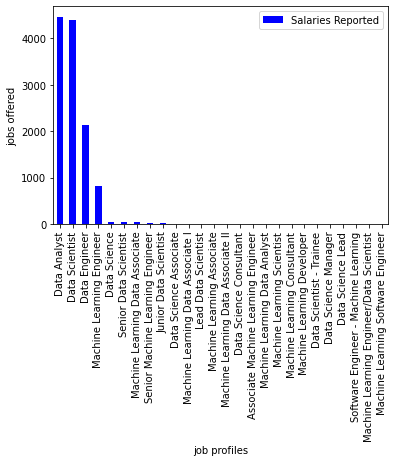

In [44]:
maxjoboffer.plot(kind='bar',color='blue')
plt.xlabel('job profiles')
plt.ylabel('jobs offered')
plt.show()

# Q) Which job profiles have maximum average salary?

In [45]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
avgsalary=df1.groupby('Job Title').mean().sort_values(by=['salary in rs/year'],ascending=False).drop(['Salaries Reported'],axis=1)
avgsalary

,salary in rs/year
Job Title,
Data Science Manager,4619021.0
Data Science Lead,4068310.0
Data Science Consultant,2671464.0
Lead Data Scientist,1852189.0
Senior Data Scientist,1766129.5
Software Engineer - Machine Learning,1566780.0
Senior Machine Learning Engineer,1473436.0
Data Scientist,1465962.4
Machine Learning Software Engineer,1397347.0


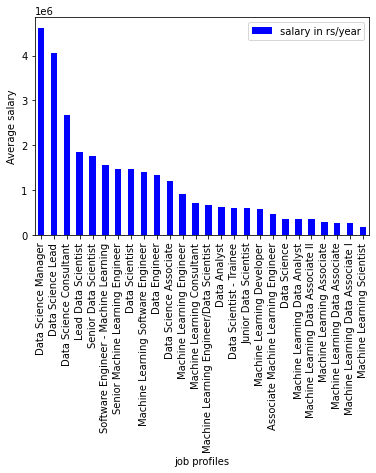

In [46]:
avgsalary.plot(kind='bar',color='blue')
plt.xlabel('job profiles')
plt.ylabel('Average salary')
plt.show()

# Q) Which companies give maximum job offerings?

In [47]:
maxjobofferbycom=df1.groupby('Company Name').sum().drop(['salary in rs/year'],axis=1).sort_values(by=['Salaries Reported'],ascending=False).head(30)
maxjobofferbycom

,Salaries Reported
Company Name,
Tata Consultancy Services,551.0
Accenture,312.0
IBM,307.0
Amazon,283.0
Quantiphi,198.0
Cognizant Technology Solutions,188.0
Infosys,185.0
Capgemini,173.0
Mu Sigma,161.0


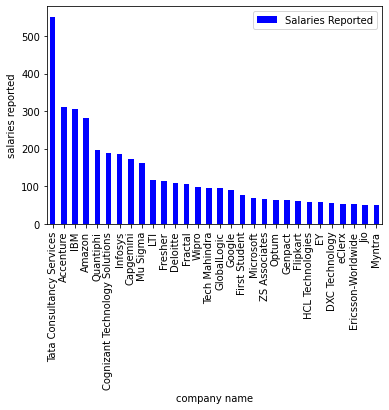

In [48]:
maxjobofferbycom.plot(kind='bar',color='blue')
plt.xlabel('company name')
plt.ylabel('salaries reported')
plt.show()

# Q) Which companies give highest average salary?

In [49]:
avgsalarybycom=df1.groupby('Company Name').mean().sort_values(by=['salary in rs/year'],ascending=False).drop(['Salaries Reported'],axis=1).head(30)
avgsalarybycom

,salary in rs/year
Company Name,
MiQ,43714286.6
Turing.com,40402696.8
ServiceNow,33103252.4
Saama Technologies,19688293.9
L Brands,18807948.0
Datametica,17624472.1
Larvol Group,16943066.4
Meta,15471797.0
Simplilearn Solutions,13902120.0


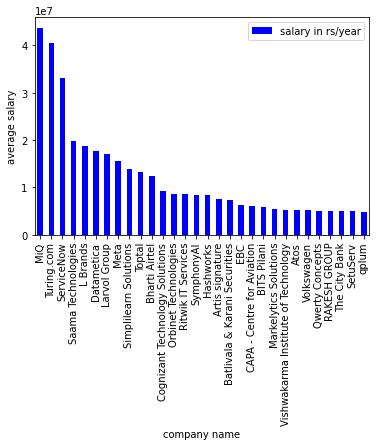

In [50]:
avgsalarybycom.plot(kind='bar',color='blue')
plt.xlabel('company name')
plt.ylabel('average salary')
plt.show()

# Q) Which city have maximum job offerings?

In [51]:
maxjobofferbyplace=df1.groupby('Location').sum().sort_values(by=['Salaries Reported'],ascending=False).drop(['salary in rs/year'],axis=1)
maxjobofferbyplace

,Salaries Reported
Location,
Bangalore,4897.0
New Delhi,2223.0
Pune,1684.0
Hyderabad,1668.0
Mumbai,1581.0


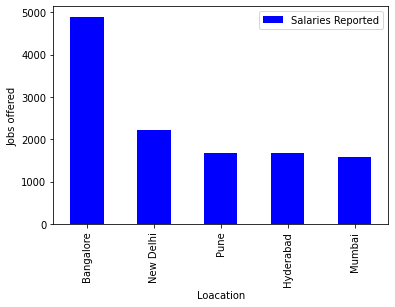

In [52]:
maxjobofferbyplace.plot(kind='bar',color='blue')
plt.xlabel('Loacation')
plt.ylabel('Jobs offered')
plt.show()